In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [9]:
df_perf = pd.read_csv('minkowski_performance.csv')
df_dist = pd.read_csv('minkowski_distances.csv')

In [10]:
if 'df_perf' in locals():
    df_perf['total_input_vertices'] = df_perf['obstacle_vertices'] + df_perf['robot_vertices']
    df_perf['ratio_output_input'] = df_perf['result_vertices'] / df_perf['total_input_vertices']

    # Agrupamento para média de desempenho
    df_grouped_perf = df_perf.groupby('total_input_vertices')['time_microseconds'].mean().reset_index()
    df_grouped_ratio = df_perf.groupby('total_input_vertices')['ratio_output_input'].mean().reset_index()

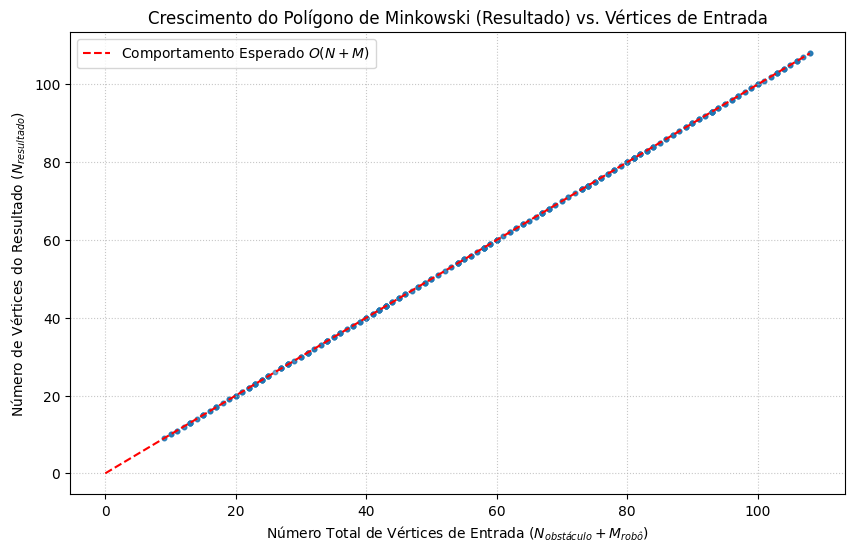


---


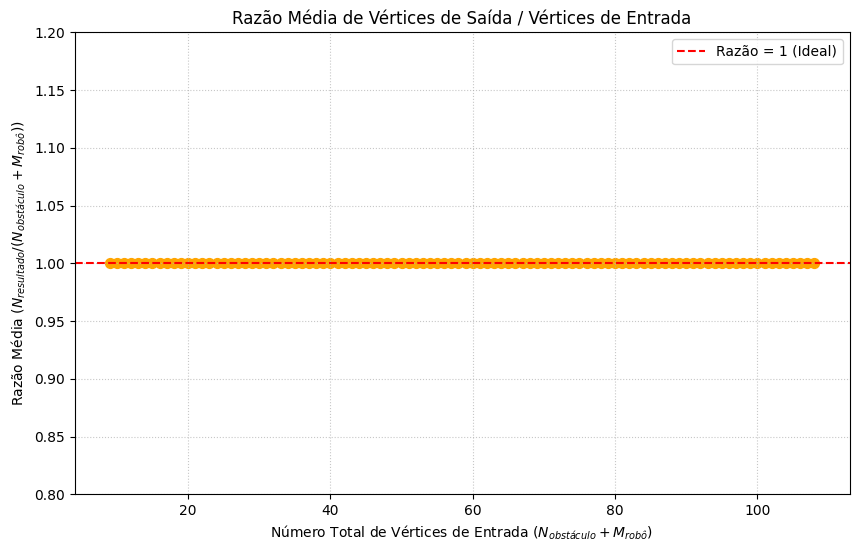


---


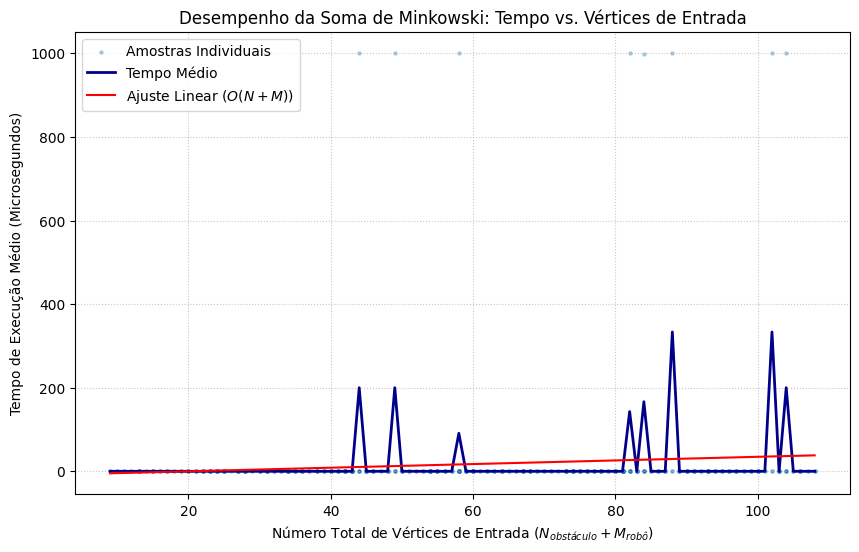

In [11]:
if 'df_perf' in locals():
    ## Gráfico 1: Crescimento conforme mais pontos são adicionados (Tamanho do Resultado)
    # O resultado (soma de Minkowski) é o número de vértices do polígono resultante (result_vertices).
    plt.figure(figsize=(10, 6))

    # Plotamos o número de vértices do resultado vs. o número total de vértices de entrada (Obstáculo + Robô)
    plt.scatter(df_perf['total_input_vertices'], df_perf['result_vertices'], alpha=0.6, s=10)

    # Linha teórica N+M (Linear)
    max_v = df_perf['total_input_vertices'].max()
    plt.plot([0, max_v], [0, max_v], color='red', linestyle='--', label=r'Comportamento Esperado $O(N+M)$')

    plt.title('Crescimento do Polígono de Minkowski (Resultado) vs. Vértices de Entrada')
    plt.xlabel('Número Total de Vértices de Entrada ($N_{obstáculo} + M_{robô}$)')
    plt.ylabel('Número de Vértices do Resultado ($N_{resultado}$)')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()

    print("\n---")

    # Gráfico 1.1: Razão Vértices de Saída / Vértices de Entrada (Deve ser próximo de 1)
    plt.figure(figsize=(10, 6))
    plt.scatter(df_grouped_ratio['total_input_vertices'], df_grouped_ratio['ratio_output_input'], color='orange', s=50)
    plt.axhline(y=1, color='red', linestyle='--', label='Razão = 1 (Ideal)')
    plt.title('Razão Média de Vértices de Saída / Vértices de Entrada')
    plt.xlabel('Número Total de Vértices de Entrada ($N_{obstáculo} + M_{robô}$)')
    plt.ylabel('Razão Média ($N_{resultado} / (N_{obstáculo} + M_{robô})$)')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.ylim(0.8, 1.2) # Ajusta o limite Y para focar na razão próxima de 1
    plt.show()

    ## Gráfico 2: Desempenho do Algoritmo (Tempo vs Vértices de Entrada)
    plt.figure(figsize=(10, 6))

    # Scatter plot dos dados brutos (tempo)
    plt.scatter(df_perf['total_input_vertices'], df_perf['time_microseconds'], alpha=0.3, label='Amostras Individuais', s=5)

    # Plot da Média Agrupada (mais limpo)
    plt.plot(df_grouped_perf['total_input_vertices'], df_grouped_perf['time_microseconds'],
             color='darkblue', linewidth=2, label='Tempo Médio')

    plt.title('Desempenho da Soma de Minkowski: Tempo vs. Vértices de Entrada')
    plt.xlabel('Número Total de Vértices de Entrada ($N_{obstáculo} + M_{robô}$)')
    plt.ylabel('Tempo de Execução Médio (Microsegundos)')

    # Opcional: Ajustar uma linha de regressão linear para confirmar o O(N+M)
    z = np.polyfit(df_grouped_perf['total_input_vertices'], df_grouped_perf['time_microseconds'], 1)
    p = np.poly1d(z)
    plt.plot(df_grouped_perf['total_input_vertices'], p(df_grouped_perf['total_input_vertices']),
             color='red', linestyle='-', label=f'Ajuste Linear ($O(N+M)$)')

    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()


In [12]:

# --- Tabela de Distância Mínima ---
if 'df_dist' in locals():
    print("Tabela de Distância Mínima (Amostras Iniciais):")
    # Exibir as 10 primeiras amostras
    # Calcula a soma dos vértices de entrada para a tabela
    df_dist['total_vertices'] = df_dist['obstacle_vertices'] + df_dist['robot_vertices']

    # Formatação para melhor visualização
    df_tabela = df_dist[['pair_id', 'obstacle_vertices', 'robot_vertices', 'total_vertices', 'min_distance']].head(10).copy()
    df_tabela['min_distance'] = df_tabela['min_distance'].round(3)

    print(df_tabela.to_markdown(index=False))

Tabela de Distância Mínima (Amostras Iniciais):
| pair_id   |   obstacle_vertices |   robot_vertices |   total_vertices |   min_distance |
|:----------|--------------------:|-----------------:|-----------------:|---------------:|
| 0-4       |                  62 |                3 |               65 |        174.623 |
| 1-4       |                  54 |                3 |               57 |        174.623 |
| 2-0       |                  98 |                6 |              104 |        212.745 |
| 3-1       |                  68 |                7 |               75 |        212.745 |
| 4-3       |                  55 |                8 |               63 |        213.497 |
| 5-1       |                  80 |                7 |               87 |        212.745 |
| 6-2       |                  12 |                5 |               17 |        350.294 |
| 7-1       |                  36 |                7 |               43 |        213.497 |
| 8-1       |                  61 |       